### Multi Variable Linear Regression

Multi Variable linear regression works in the same way as the single variables examples we did before. The only difference will be that each "training sample" will contain now more variables, so it'll be expressed in arrays of a different shape.

In this example, we'll try to predict the length of a fish, given its age and the temperature of the water ([dataset source](http://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html)).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as matcoll

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
df = pd.read_csv(
    'data/x06.txt', skiprows=37, skipinitialspace=True,
    delimiter=' ',
    names=['idx', 'Age', 'Temp', 'Length'],
    usecols=['Age', 'Temp', 'Length'])

df.head()

,Age,Temp,Length
0,14,25,620
1,28,25,1315
2,41,25,2120
3,55,25,2600
4,69,25,3110


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
Age       44 non-null int64
Temp      44 non-null int64
Length    44 non-null int64
dtypes: int64(3)
memory usage: 1.1 KB


We'll start by splitting the data. There are 44 rows in this dataset, so we'll split it in 30 + 14:

In [6]:
train_df = df.iloc[:30]
test_df = df.iloc[30:]

The most important step here is to represent the data as a matrix, as we've done before, but now it'll look a little more evident its final purpose:

In [10]:
train_df[['Age', 'Temp']].as_matrix()

array([[ 14,  25],
       [ 28,  25],
       [ 41,  25],
       [ 55,  25],
       [ 69,  25],
       [ 83,  25],
       [ 97,  25],
       [111,  25],
       [125,  25],
       [139,  25],
       [153,  25],
       [ 14,  27],
       [ 28,  27],
       [ 41,  27],
       [ 55,  27],
       [ 69,  27],
       [ 83,  27],
       [ 97,  27],
       [111,  27],
       [125,  27],
       [139,  27],
       [153,  27],
       [ 14,  29],
       [ 28,  29],
       [ 41,  29],
       [ 55,  29],
       [ 69,  29],
       [ 83,  29],
       [ 97,  29],
       [111,  29]])

In [14]:
X_train = train_df[['Age', 'Temp']].as_matrix()
Y_train = train_df['Length'].values

X_test = test_df[['Age', 'Temp']].as_matrix()
Y_test = test_df['Length'].values

Now that we've split our data, we're ready to predict our values:

In [15]:
lr = LinearRegression()

lr.fit(X_train, Y_train)

/Users/santiagobasulto/.virtualenvs/ds-classes/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

As we have now 2 variables, we'll have 2 parameters `w1` and `w2` predicted:

In [16]:
lr.coef_

array([ 31.30397489, 100.08535229])

Plus the regular intercept:

In [17]:
lr.intercept_

-1919.1425597189104

And we're ready to predict our testing set:

In [18]:
predicted = lr.predict(X_test)

In [21]:
results = pd.DataFrame({
    'Real Length': Y_test,
    'Predicted Length': predicted,
    'Difference': np.abs(Y_test - predicted)
}, columns=['Real Length', 'Predicted Length', 'Difference'])

results

,Real Length,Predicted Length,Difference
0,4525,4896.329518,371.329518
1,4565,5334.585167,769.585167
2,4566,5772.840815,1206.840815
3,590,1621.759010,1031.759010
4,1205,2060.014658,855.014658
5,1915,2466.966332,551.966332
6,2140,2905.221980,765.221980
7,2710,3343.477629,633.477629
8,3020,3781.733277,761.733277
9,3030,4219.988926,1189.988926


Our prediction doesn't look so good, so maybe fish don't follow a linear model 😅:

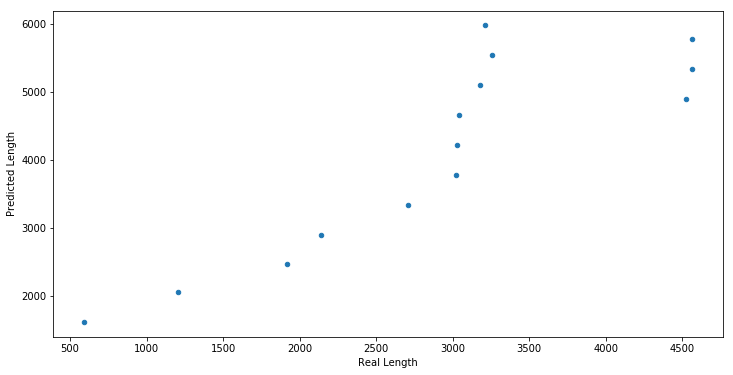

In [23]:
results.plot.scatter(x='Real Length', y='Predicted Length', figsize=(12, 6))

Our regular scores tell us the same:

In [24]:
lr.score(X_test, Y_test)

-0.43837107984784307

In [25]:
np.sqrt(mean_squared_error(Y_test, predicted))

1372.225253380165